# Compare fitted atmospheric parameters

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 12th 2023
- last update : February 13th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [10]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [25]:
DATE=20230118

In [5]:
filenames = [
"fitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv",
"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv"
]

In [9]:
all_df = []
for filename in filenames:
    all_df.append(pd.read_csv(filename))

In [20]:
NF =len(all_df)

In [21]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_40278/1489658469.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


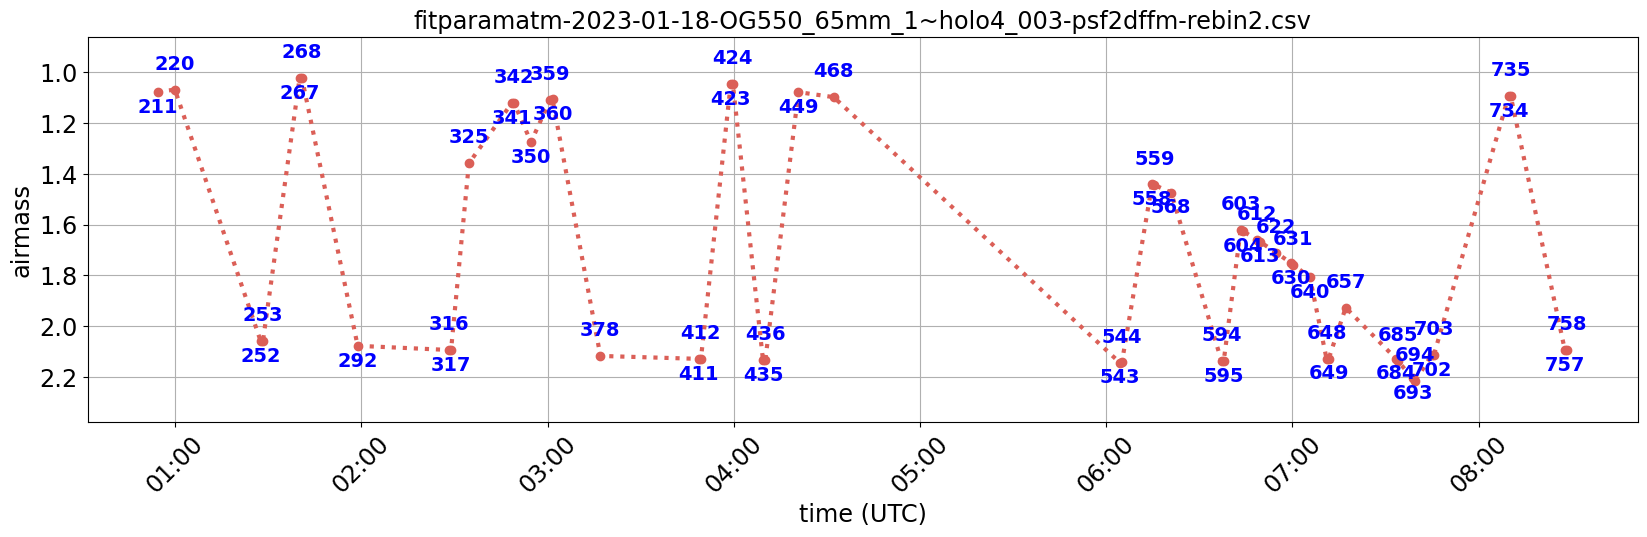

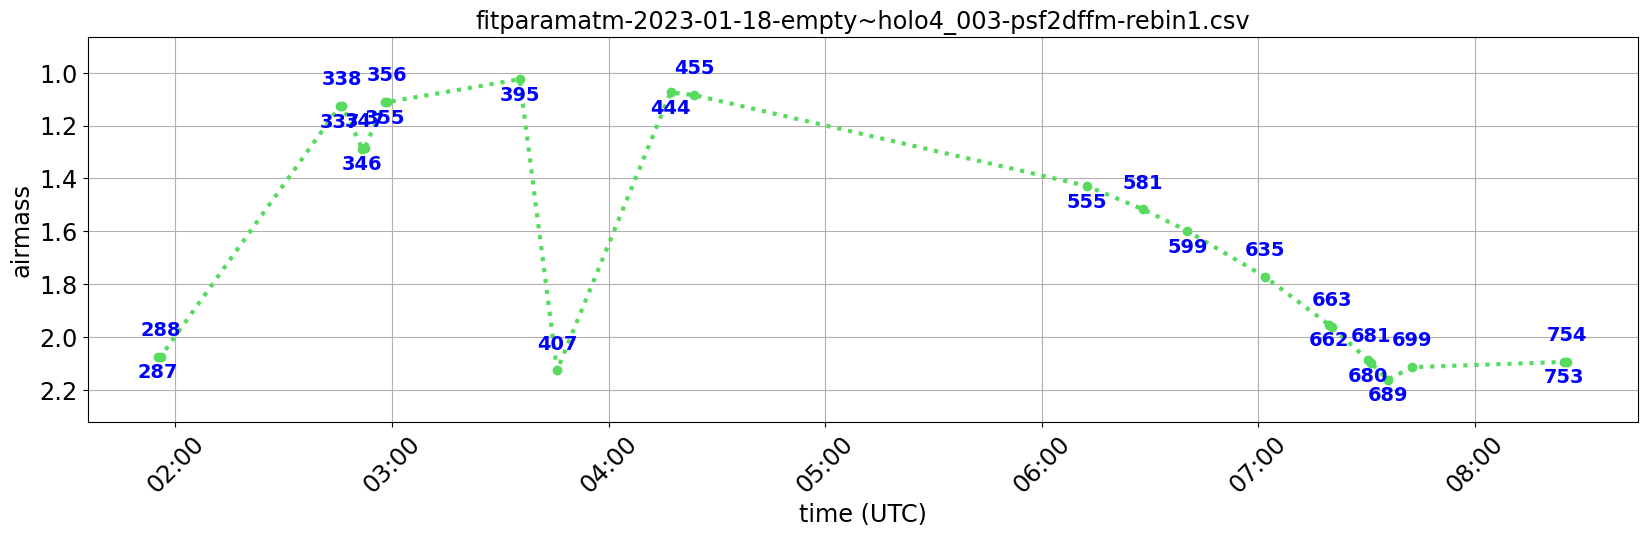

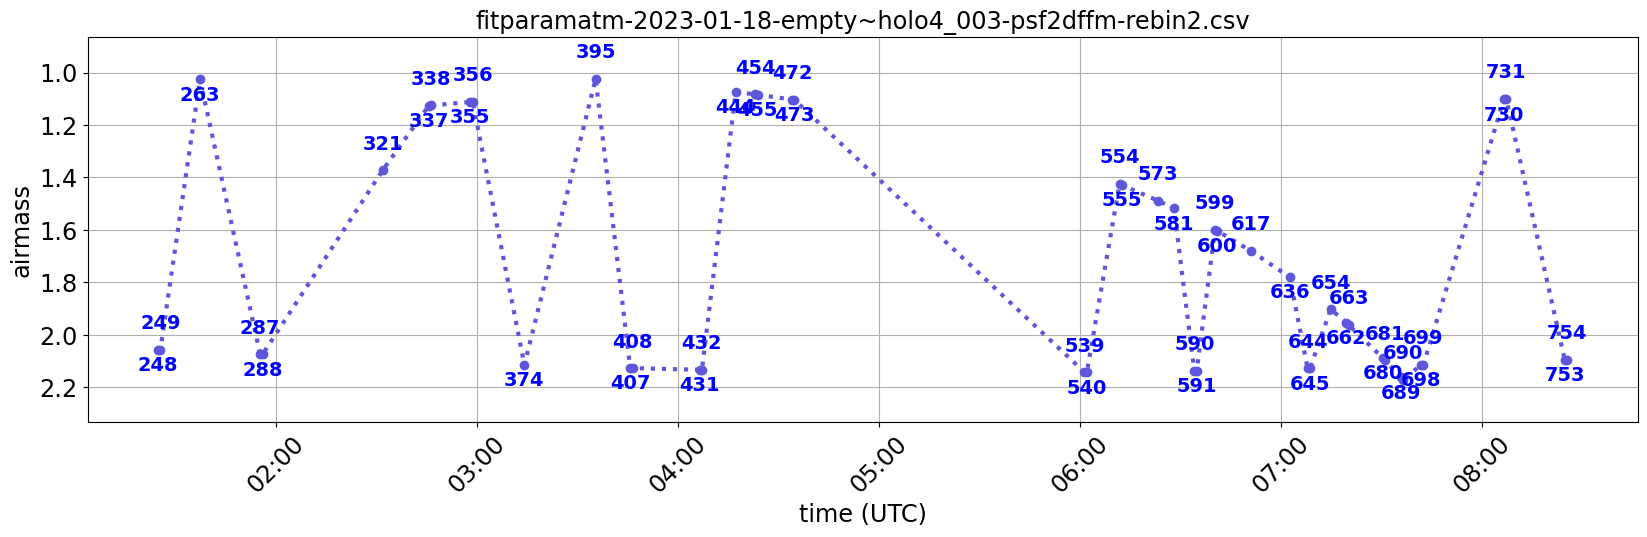

In [30]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)

    

    y_shift= 0.08

  
    ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("airmass")
    ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

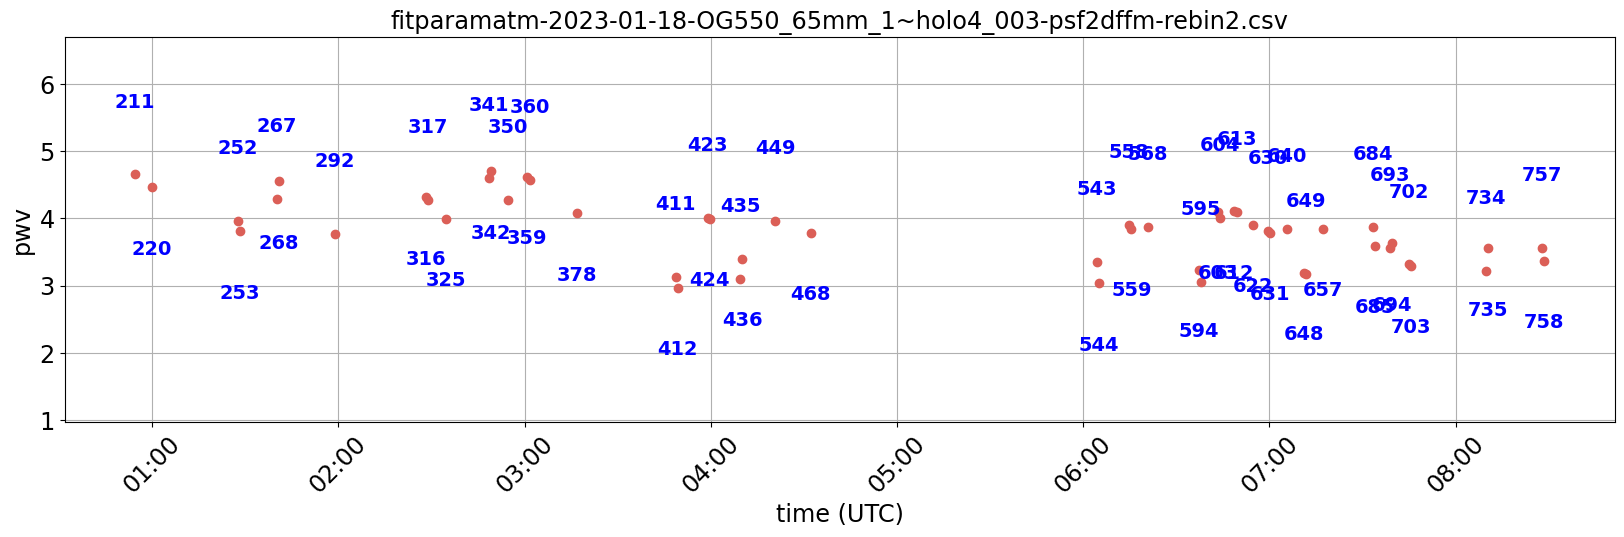

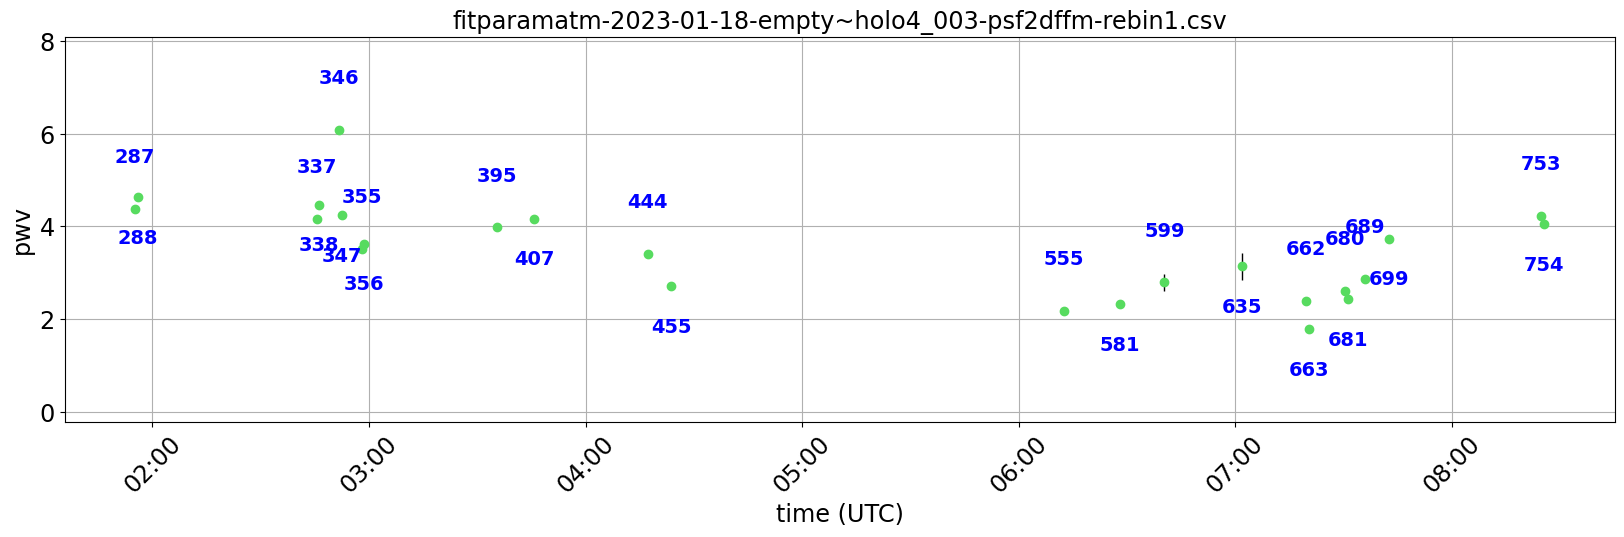

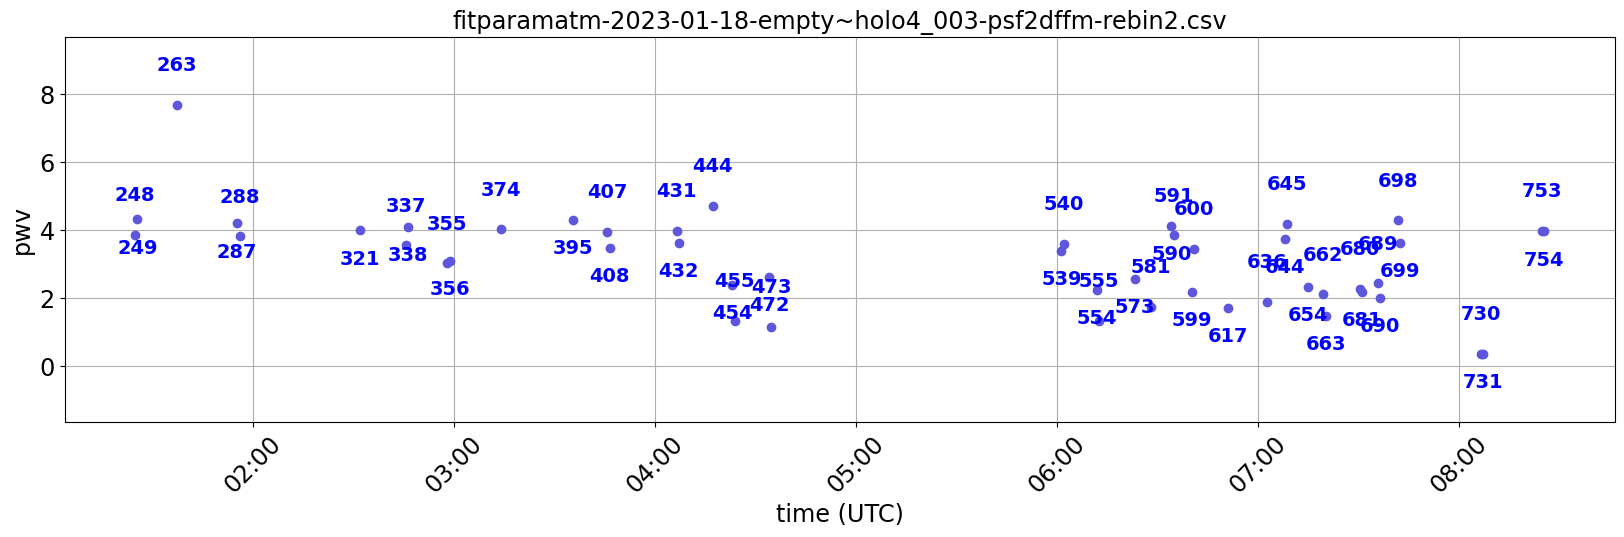

In [36]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    